# INFO 2950 Fall 2024 Homework 4

For each answer code cell, **do not** erase the line stating `#A1: your code here`; instead, write your answer code directly below the line.

You will turn in this notebook without any of the data files. When you turn in this homework, all cells must be executed and the notebook saved with output included. You must also save your **fully executed notebook** as a pdf following the instructions in the Student Handbook posted on Canvas > Modules > Course Policies.

A **fully executed notebook** means that you should be seeing the expected output printed below the cell after you click "Restart Kernel and Run All Cells." *If any cell in the PDF of your notebook does not have the expected output printed below it, it will not be considered fully executed and you will not receive points for the questions in that cell.*

**If you use any sources aside from the standard documentation of Python libraries, you must cite the sources (e.g., StackOverflow links) used to answer the below questions. If you use ChatGPT, you must include proof of the prompt you used, as well as a line-by-line explanation of why the code is correct. Simply noting that the code makes sense does not suffice as an explanation.**

The goal of this homework is to get hands-on experience with linear and logistic regression in two real-world datasets. In this homework, you will practice using train and test splits with linear and logistic regression. You will evaluate the model's performance on the train/test splits using various evaluation metrics.

Part of this homework will involve practicing how to use online resources. *Nobody* remembers everything. There is no level of experience that will allow you to never use documentation and question-answer forums. The key is to use these in ways that help you grow your skills, not in ways that prevent you from growing. They also provide an opportunity to express gratitude for people who helped you.

**NetID:** kl739

---

## Problem 0
Do not move or modify this cell, we use it for automated homework analysis.

**This problem is for you to use to cite your sources.**

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources (like Stack Overflow) you found useful and mention fellow students, TAs, or other people who helped you. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct. If you do not appropriately fill out Problem 0, you will receive 0 points on the entire homework assignment.



**ADD YOUR SOURCES HERE**

---

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, \
    KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, accuracy_score, precision_score, \
        recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

# Section A: Multivariable Linear Regression

The goal of this section is to develop a generalizable linear regression model to predict flight delays based on relevant airplane, airport, and weather attributes. We will use flight data from the book [*R for Data Science*](https://r4ds.hadley.nz/) by Wickham and Grolemund.

The file `flights.csv` contains detailed information on a sample of flights departing from NYC to destinations in the United States, Puerto Rico, and the American Virgin Islands in 2013. More information about the dataset can be found on the [GitHub page](https://github.com/tidyverse/nycflights13) associated with the R package that maintains the data.

More recent R packages have been developed to pull updated versions of the data. For example, you can check out the R package [`anyflights`](https://github.com/simonpcouch/anyflights) or [`nycflights`](https://github.com/simonpcouch/anyflights).

## Problem A1 (2 points)

Using `pandas`, create a DataFrame called `flights` from the CSV file `flights.csv`. Print the shape of the dataframe. Then print the first five rows and the first five columns using `.iloc`.

In [2]:
## A1: your code here
flights = pd.read_csv("flights.csv")
print(flights.shape)
print(flights.iloc[:5, :5])

(100000, 25)
   month  day  dep_delay  arr_time  sched_arr_time
0     10   20        -11      1651            1728
1      8   20         30      2215            2242
2      4   20         -2      1002            1012
3      8    6         -2      1956            2010
4      3   29         -5       802             816


**A1 Expected Output**  
```
(100000, 25)
   month  day  dep_delay  arr_time  sched_arr_time
0     10   20        -11      1651            1728
1      8   20         30      2215            2242
2      4   20         -2      1002            1012
3      8    6         -2      1956            2010
4      3   29         -5       802             816
```

## Problem A2 (3 points)

Linear regression assumes that the input values are numbers, but the values for many attributes in the `flights` data are non-numeric. Some of these columns are categorical and may require the creation of indicator variables to be useful in our regressions.

Use [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to create the appropriate indicator variables for the three `origin` airports. Use the argument `drop_first=True` to avoid multicollinearity issues.

*Hint #1:* You might find it helpful to first create a dataframe called `origin_df` using `pd.get_dummies()`.

*Hint #2:* Then you can merge this dataframe back onto `flights` using `pd.concat()`. You should call the resulting dataframe `flights`, which will effectively overwrite the original dataframe you produced in A1.

Print the shape of the dataframe after this transformation.

In [3]:
## A2: your code here
origin_df = pd.get_dummies(flights['origin'], drop_first = True)
flights = pd.concat([flights, origin_df], axis = 1)
print(flights.shape)

(100000, 27)


**A2 Expected Output**

`
(100000, 27)
`

## Problem A3 (2 points)

Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function to **replace** the string values in the `engines` column with the proper numeric values. We've included a dictionary to help you with this.

Print the head of `flights["engines"]` after this transformation. You may see dtypes `int32` or `int64` in the output. Either is fine.

In [4]:
# Given code
# These dictionaries map strings to numeric values for the engine variable

engine_map = {"1 engine": 1, "2 engines": 2, "3 engines": 3, "4 engines": 4}

In [5]:
## A3: your code here
flights['engines'] = flights['engines'].map(engine_map)
print(flights['engines'].head())

0    2
1    2
2    2
3    2
4    2
Name: engines, dtype: int64


**A3 Expected Output**
```
0    2
1    2
2    2
3    2
4    2
Name: engines, dtype: int64
```

## Problem A4 (3 points)

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create two new dataframes, `flights_train` and `flights_test`, with 10% of the data in the test set and a random state of 2950 (setting the random state will ensure that the TAs can check your outputs quickly). Print the shape of `flights_train` and the shape of `flights_test`, in that order.

*Hint #1:* You can set the output of `train_test_split` to two variables.

In [6]:
## A4: your code here
flights_train, flights_test = train_test_split(flights, \
                            test_size = 0.1, random_state = 2950)
print(flights_train.shape)
print(flights_test.shape)

(90000, 27)
(10000, 27)


**A4 Expected Output**
```
(90000, 27)
(10000, 27)
```

## Problem A5 (4 points)

Part a: Run a linear regression with the training dataframe, `flights_train`, using the input variables in `input_vars` (`dep_delay`, `engines`, `wind_speed`, `visib`, `JFK`, and `LGA`) and output variable `arr_delay`. Name the regression `model`.

Part b: Using the given code that loops through `input_vars` and the trained model's coefficients, print out each variable name and coefficient value (e.g. `engines: 2.35`). Note: a helpful way to loop through a paired set of values is to use the [`zip()`](https://www.programiz.com/python-programming/methods/built-in/zip) function. We have already implemented this approach for you in the code below.

Part c: Print the model's intercept (e.g. `intercept: -3.83`). You should do this outside of the loop.

For all printed variable and value combinations, use string formatting and round all numbers to two decimals.

In [7]:
# Given input list
input_vars = ["dep_delay", "engines", "wind_speed", "visib", "JFK", "LGA"]

## A5 part a: your code here
X = flights_train[input_vars]
y = flights_train['arr_delay']
model = LinearRegression().fit(X, y)

# Given code
for var_name, var_coef in zip(input_vars, model.coef_):
    # A5 part b: your code here
    print(f"{var_name}: {round(var_coef, 2)}")


# A5 part c: your code here
print("intercept:", round(model.intercept_, 2))

dep_delay: 1.01
engines: 2.35
wind_speed: 0.18
visib: -1.17
JFK: -1.65
LGA: 2.73
intercept: -3.83


**A5 Expected Output**

```
dep_delay: 1.01
engines: 2.35
wind_speed: 0.18
visib: -1.17
JFK: -1.65
LGA: 2.73
intercept: -3.83
```

## Problem A6 (3 points)
Consider the trained model's coefficients in the previous question. To understand what each of the coefficients means, you can read the documentation from the associated R package [here](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf).

In 1-2 complete sentences, interpret the regression by summarizing the effect of `visib` (visibility in miles) on `arr_delay` (arrival delay in minutes). Note: negative values of `arr_delay` represent early arrivals.

**A6: Your interpretation here**  
When visibility (by miles) increases, arrival delays decrease and the flights arrive earliers. More specifically, as visibility increases by 1.0 miles, arrival delays decrease by 1.17 minutes. 

## Problem A7 (3 points)
To further interpret this regression, we want to make predictions. In class, we have done this by making predictions based on one specific value for each of the inputs (`dep_delay`, `engines`, `wind_speed`, `visib`, `JFK`, and `LGA`). Here, we want to make predictions with our model based on the specific values of each of the inputs that were in our original training set and test set.

Use the training set data as input to create an array of predicted $\hat{y}$ values called `train_predictions`. Then, use the test set data as input to create an array of predicted $\hat{y}$ values called `test_predictions`.

Then, print the length of `train_predictions` and `test_predictions`, in that order.

In [8]:
## A7: your code here
train_predictions = model.predict(X)
print(len(train_predictions))

test_predictions = model.predict(flights_test[input_vars])
print(len(test_predictions))

90000
10000


**A7 Expected Output**


```
90000
10000
```

## Problem A8 (4 points)

Root Mean Squared Error (RMSE) is defined as RMSE = $\sqrt{\frac{1}{n}Σ(y_{i} - ŷ_{i})^2}$

Use basic numpy functions (like `np.sqrt()` and `np.mean()`) to calculate the RMSE between $\hat{y}$  (`train_predictions`) and y (the true value of y, which is the `arr_delay` column of the training set `flights_train`). Repeat this to find the RMSE between the test set’s $\hat{y}$ and the test set’s y.

Print the train and test set RMSEs using string formatting and rounding all numbers to two decimals.

In [9]:
## A8: your code here
train_rmse = np.sqrt(np.mean((y - train_predictions)**2))
print("Train RMSE:", round(train_rmse, 2))

test_rmse = np.sqrt(np.mean((flights_test['arr_delay'] - \
                             test_predictions)**2))
print("Test RMSE:", round(test_rmse, 2))

Train RMSE: 18.47
Test RMSE: 18.5


**A8 Expected Output**
```
Train RMSE: 18.47
Test RMSE: 18.5
```


In [10]:
## Confidence check: use sklearn's root_mean_squared_error function to check your calculated results
print(f"Train RMSE: {round(root_mean_squared_error(flights_train["arr_delay"], \
                                                train_predictions), 2)}")
print(f"Test RMSE: {round(root_mean_squared_error(flights_test["arr_delay"], \
                                                test_predictions), 2)}")

Train RMSE: 18.47
Test RMSE: 18.5


## Problem A9 (4 points)

Mean Absolute Error (MAE) is defined as MAE = $\frac{1}{n}Σ|y_{i} - ŷ_{i}|$

Use basic numpy functions (like `np.mean()` and `np.abs()`) to calculate the MAE between $\hat{y}$ (`train_predictions`) and y (the true value of y, which is the `arr_delay` column of the training set `flights_train`). Repeat this to find the MAE between the test set’s $\hat{y}$  and the test set’s y.

Print the train and test set MAEs using string formatting and rounding all numbers to two decimals.

In [11]:
## A9: your code here
train_mae = np.mean(np.abs(y - train_predictions))
print("Train MAE:", round(train_mae, 2))

test_mae = np.mean(np.abs(flights_test['arr_delay'] - test_predictions))
print("Test MAE:", round(test_mae, 2))

Train MAE: 13.55
Test MAE: 13.57


**A9 Expected Output**  
```
Train MAE: 13.55
Test MAE: 13.57
```

In [12]:
## Confidence check: use sklearn's mean_absolute_error function to check your calculated results
print(f"Train MAE: {round(mean_absolute_error(flights_train["arr_delay"], \
                                            train_predictions), 2)}")
print(f"Test MAE: {round(mean_absolute_error(flights_test["arr_delay"], \
                                             test_predictions), 2)}")

Train MAE: 13.55
Test MAE: 13.57


## Problem A10 (2 points)
In 1-2 sentences, explain why is it useful to look at both the RMSE and the MAE instead of only one of these metrics.

**A10: Your answer here**  
Both the RMSE and the MAE are ways to measure the difference between the actual values and the predicted y values, but because the RMSE squares the difference, it is more sensitive to outliers. Looking at both the RMSE and the MAE gives us a better look at if the model is an accurate fit. 

## Problem A11 (2 points)
In 1-2 sentences, based on the RMSE and the MAE that you observe for both the training and test data, do you think this model generalizes well out of sample?

**A11: Your answer here**  
Based on the RMSE and the MAE that were calculated for both the training and test data, I think the model generalizes well out of sample. The RMSE and MAE for the training set were both close to those of the test set, and all of these values were reasonably low. 

## Problem A12 (4 points)

For the rest of Section A, we will only use the `flights_train` dataframe and not the `flights_test` dataframe, since we’re trying to explore the data without biasing how we run our final analysis.

Using the predictions that we generated in A6 called `train_predictions` and the true `arr_delay` value from the `flights_train` dataframe, calculate the residuals of our `model` and save the residuals value to the variable `residuals`. Print the head of `residuals`.

In [13]:
## A12: your code here
residuals = flights_train['arr_delay'] - train_predictions
print(residuals.head())

7171      7.194330
11350     0.977870
63208   -11.077568
1230     43.660877
90340     7.198414
Name: arr_delay, dtype: float64


**A12 Expected Output**  

```
7171      7.194330
11350     0.977870
63208   -11.077568
1230     43.660877
90340     7.198414
Name: arr_delay, dtype: float64
```

## Problem A13 (3 points)


Write a function called `generate_residual_plot` that takes in two arguments (`pred` and `resid`) and produces a residual plot. Using this function, vsualize the `train_predictions` and `residuals` from A7 as a scatterplot. Make sure your plot follows the two specifications below:

1. Use `pred` as the x-axis and `resid` as the y-axis. Name the axes "Predicted Flight Delays" and "Residuals," respectively.
2. Visualize this data as a scatter plot with markers (set parameter `marker="o"`).
3. Use matplotlib's [`axhline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) function to draw a horizonal line at $y=0$ (set parameter `color="black"`).

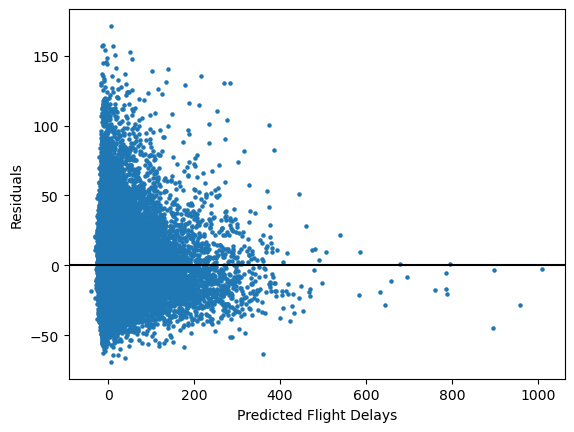

In [14]:
## A13: your code here
def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker = 'o', s = 5)
    plt.xlabel('Predicted Flight Delays')
    plt.ylabel('Residuals')
    plt.axhline(y = 0, color = 'black')

generate_residual_plot(train_predictions, residuals)
plt.show()

## Problem A14 (2 points)

What does the shape of the residual plot tell you about the underlying data? Is this problematic? If so, what can we do to fix this?

**A14: Your answer here.**

* The residual plot is heteroskedastic which tells me that the underlying data is not linear and needs to be transformed. 
* This is a problem because it means that our data has differing variance of residuals which can skew our analysis.
* We can use transforms on the data to ensure the residuals have equal variance. 

## Problem A15 (2 points)

Part a: Revisit the model you generated in A4. Now, you will run a linear regression to predict `arr_delay` with a modified set of `input_vars` (`engines`, `wind_speed`, `visib`, `JFK`, and `LGA`) that excludes `dep_delay` (i.e., the plane's departure delay). Name this regression `model` as before.

Part b: As before, loop through `input_vars` and the trained model's coefficients to print out each variable name and coefficient value (e.g. `engines: 1.67`). We have provided given code that implements the loop using [`zip()`](https://www.programiz.com/python-programming/methods/built-in/zip) function.

Part c: Print the model's intercept (e.g. `intercept: 19.92`). You should do this outside of the loop.

For all printed variable and value combinations, use string formatting and round all numbers to two decimals.

In [15]:
# Given input list
input_vars = ["engines", "wind_speed", "visib", "JFK", "LGA"]

# A15 part a: your code here
X = flights_train[input_vars]
y = flights_train['arr_delay']
model = LinearRegression().fit(X, y)

# Given code
for var_name, var_coef in zip(input_vars, model.coef_):
    # A15 part b: your code here
    print(f"{var_name}: {round(var_coef, 2)}")

# A15 part c: your code here
print("intercept:", round(model.intercept_, 2))

engines: 1.67
wind_speed: 0.52
visib: -2.64
JFK: -5.87
LGA: -0.57
intercept: 19.92


**A15 Expected Output**
```
engines: 1.67
wind_speed: 0.52
visib: -2.64
JFK: -5.87
LGA: -0.57
intercept: 19.92
```

## Problem A16 (4 points)

On the training set only, produce new predictions and residuals. Call them `train_predictions` and `residuals` as before. Using the function you wrote in A13, generate a new residual plot.

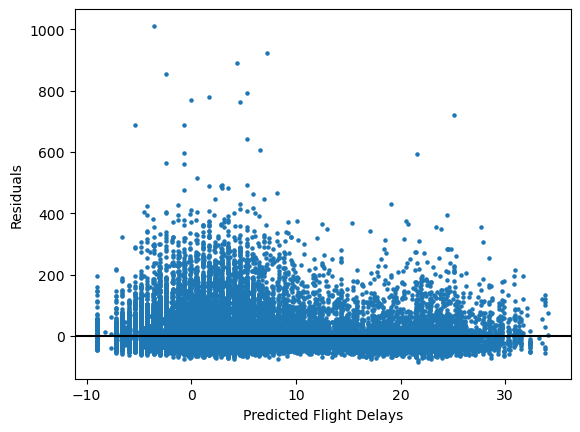

In [16]:
## A16: your code here

# Make predictions on train
train_predictions = model.predict(X)
residuals = flights_train['arr_delay'] - train_predictions

# Generate residual plot
generate_residual_plot(train_predictions, residuals)

## Problem A17 (2 points)

Compare the plot in A16 to the plot in A13. What differences do you observe? What was the importance of excluding `dep_delay` (i.e., the delay of the plane's departure) from the regression?

**A17: Your answer here.**

* There is a greater range of residuals and smaller range of the number of predicted flight delays, and the residuals seem more randomly dispersed than the plot in A13. 
* Removing `dep_delay` from the regression means our model cannot make predictions based on/taking into account departure delays. 

## Problem A18 (2 points)
Recalculate RMSE and MAE using `sklearn`'s [`root_mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html) and [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) functions.

Print the train set RMSEs and MAEs using string formatting and rounding all numbers to two decimals.

In [17]:
## A18: your code here
train_rmse = root_mean_squared_error(y_true = flights_train['arr_delay'], \
                                     y_pred = train_predictions)
print("Train RMSE:", round(train_rmse, 2))

train_mae = mean_absolute_error(y_true = flights_train['arr_delay'], \
                                y_pred = train_predictions)
print("Train MAE:", round(train_mae, 2))

Train RMSE: 41.63
Train MAE: 24.68


**A18 Expected Output**
```
Train RMSE: 41.63
Train MAE: 24.68
```

## Problem A19
In one sentence, compare the train RMSE and MAE from your original model (with `dep_delay` included as an input variable) and your new model (without `dep_delay`).

**A19: Your answer here.**
The train RMSE and MAE from my original model (with `dep_delay` included as an input variable) were a lot lower than the train RMSE and MAE of my new model (without `dep_delay`). 


## Problem A20 (2 points)

Now, we will try producing a model that uses a modified version of the outcome: `arr_delay` - `dep_delay`. This will allow us to predict arrival delays that are *not strictly* due to the departure delay and may be affected by other explanatory factors.

Produce a column in `flights_train` that is equal to `arr_delay` - `dep_delay`. Name this column `arr_delay_diff`. Print the head of `flights_train["arr_delay_diff"]`.


In [18]:
# A20: your code here
flights_train['arr_delay_diff'] = flights_train['arr_delay'] - \
    flights_train['dep_delay']
print(flights_train['arr_delay_diff'].head())


7171     -3
11350    -9
63208   -21
1230     37
90340     6
Name: arr_delay_diff, dtype: int64


**A20 Expected Output**
```
7171     -3
11350    -9
63208   -21
1230     37
90340     6
Name: arr_delay_diff, dtype: int64
```

## Problem A21 (3 points)

Part a: With `arr_delay_diff` as the outcome, run a linear regression with the `input_vars` (`engines`, `wind_speed`, `visib`, `JFK`, and `LGA`) from A15. Name this regression `model2`.

Part b: Loop through `input_vars` and the trained model's coefficients to print out each variable name and coefficient value (e.g. `engines: 1.67`). We have provided given code that implements the loop using [`zip()`](https://www.programiz.com/python-programming/methods/built-in/zip) function.

Part c: Print the model's intercept (e.g. `intercept: -3.68`). You should do this outside of the loop.

For all printed variable and value combinations, use string formatting and round all numbers to two decimals.

**Note: the coefficients look similar to A7! Think about why this might be the case.**


In [19]:
# Given input list
input_vars = ["engines", "wind_speed", "visib", "JFK", "LGA"]

# A21 part a: your code here
X = flights_train[input_vars]
y = flights_train['arr_delay_diff']
model2 = LinearRegression().fit(X, y)

# Given code
for var_name, var_coef in zip(input_vars, model2.coef_):
    # A21 part b: your code here
    print(f"{var_name}: {round(var_coef, 2)}")

# A21 part c: your code here
print("intercept:", round(model2.intercept_, 2))

engines: 2.35
wind_speed: 0.18
visib: -1.18
JFK: -1.68
LGA: 2.71
intercept: -3.68


**A21 Expected Output**

```
engines: 2.35
wind_speed: 0.18
visib: -1.18
JFK: -1.68
LGA: 2.71
intercept: -3.68
```

## Problem A22 (2 points)

On the training set only, produce new predictions and residuals. Call them `train_predictions_2` and `residuals_2`. Using the function you wrote in A13, generate a new residual plot. Make sure you are using the new outcome variable ``arr_delay_diff`.

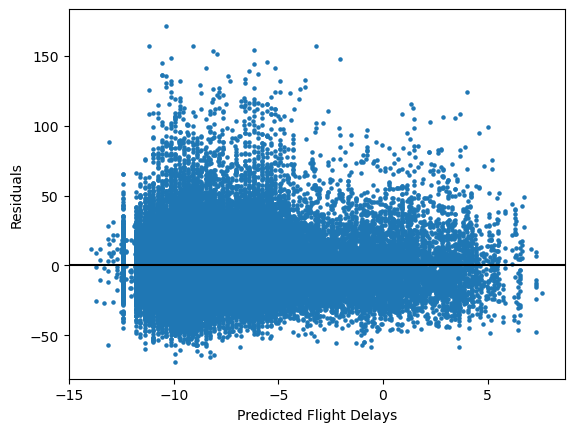

In [20]:
## A22: your code here

# Make predictions on train
train_predictions_2 = model2.predict(X)
residuals_2 = y - train_predictions_2

# Generate residual plot
generate_residual_plot(train_predictions_2, residuals_2)

You should see that the residual plot no longer is heteroskedastic. Because we accounted for the effect of departure delay in our outcome variable, we no longer see that it is skewing the variability of our predictions in relation to the true delay values. However, you may also observe that the coefficients are the same as our first model. The reason the coefficients are the same is because multivariate linear regression "holds constant" the effects of each explanatory variable. By subtracting `dep_delay` from `arr_delay`, we are effectively holding constant the effect of `dep_delay` when we look at the effects of the other `input_vars`.

---
# Section B: Multivariable Logistic Regression

The goal of this section is to develop a generalizable logistic regression model to predict whether movies will receive high IMDb user ratings based on their budget, runtime, and other attributes. We will use data on movies that has been scraped from IMDb and is hosted on Kaggle.

The file `movies.csv` contains detailed information on a sample of movies (220 movies per year between 1986 and 2016) that are listed in IMDb. More information about the dataset can be found on the [Kaggle page](https://www.kaggle.com/datasets/danielgrijalvas/movies) associated with the data.

## Problem B1 (2 points)

Using `pandas`, create a DataFrame called `movies` from the CSV file `movies.csv`.

Use string formatting to print the shape of movies in the following format: `Shape before dropping: (7668, 15)`

This dataset contains `NaN` values for a number of columns, and we only want to include movies with complete data. Use the  [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function to remove rows with missing values. Reassign this smaller dataframe to the original `movies` variable. Then, use string formatting to print the shape of movies after dropping the missing data in the following format: `Shape after dropping: (5421, 15)`

In [21]:
## B1: your code here
movies = pd.read_csv("movies.csv")

print("Shape before dropping:", movies.shape)

movies = movies.dropna()
print("Shape after dropping:", movies.shape)

Shape before dropping: (7668, 15)
Shape after dropping: (5421, 15)


**B1 Expected Output**

```
Shape before dropping: (7668, 15)
Shape after dropping: (5421, 15)
```

## Problem B2 (3 points)
In the `movies` dataset, `votes` refers to the count of IMDb user votes and `runtime` is the movie's duration. With the two columns, create a scatterplot using `matplotlib`. Make sure your plot follows the two specifications below:

1. Use `runtime` as x-axis and `votes` as y-axis. Name the axes `Runtime` and `Votes`.
2. Visualize this data as a scatter plot with markers (set parameter `marker="o"`).


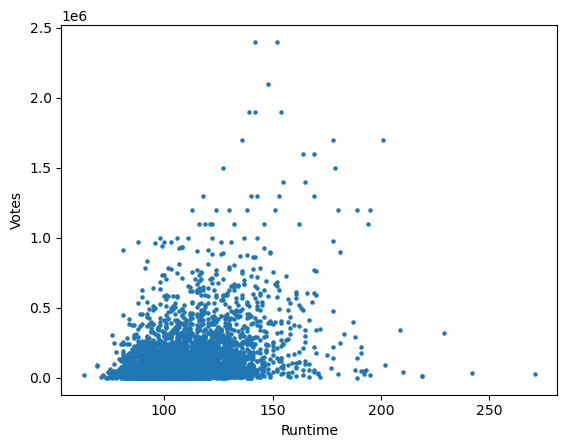

In [22]:
## B2: your code here
plt.scatter(x = movies['runtime'], y = movies['votes'], marker = "o", s = 5)
plt.xlabel('Runtime')
plt.ylabel('Votes')
plt.show()

## Problem B3 (4 points)

For the provided dataset of movies, generate rankings based on `runtime` and `votes`, creating two new columns named `runtime_rank` and `votes_rank`, respectively. When computing the rankings, handle tied ranks by using the average method.

Then, calculate Spearman correlation between the generated rankings `runtime_rank` and `votes_rank`, and Pearson correlation between the raw  `runtime` and `votes` columns using the `scipy.stats` functions [`stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr) and [`stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr). Print Spearman correlation and Pearson correlation, in that order, with string formatting. Round these numbers to two decimals.

*Hint #1:* Remember you can assign multiple variables at once from a function. Play around with this to print only the correlation and not the p-value, without brackets.

*Hint #2:* You can create rankings using the `pandas` [`rank`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rank.html) function.

In [23]:
## B3: your code here
movies['runtime_rank'] = movies['runtime'].rank()
movies['votes_rank'] = movies['votes'].rank()

# Print the Spearman and Pearson correlations
spearman_corr, spearman_pvalue = stats.spearmanr(movies['runtime_rank'], \
                                                 movies['votes_rank'])
pearson_corr, pearson_pvalue = stats.pearsonr(movies['runtime'], \
                                              movies['votes'])

print(f"Spearman correlation is {\
    spearman_corr:.2f} and Pearson correlation is {pearson_corr:.2f}")

Spearman correlation is 0.30 and Pearson correlation is 0.35


**B3 Expected Output**  
```
Spearman correlation is 0.30 and Pearson correlation is 0.35
```

## Problem B4 (3 points)

Using the `movies` dataset, screate a scatterplot of the `votes` and `score` variables using `matplotlib`. Make sure your plot follows the two specifications below:

1. Use `votes` as x-axis and `score` as y-axis. Name the axes `Votes` and `Score`.
2. Visualize this data as a scatter plot with markers (set parameter `marker="o"`).

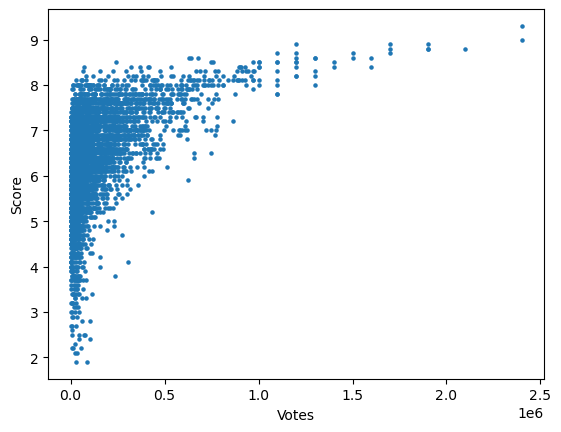

In [24]:
## B4: your code here
plt.scatter(x = movies['votes'], y = movies['score'], marker = "o", s = 5)
plt.xlabel('Votes')
plt.ylabel('Score')
plt.show()

## Problem B5 (2 points)
What does the scatterplot tell you about the relationship between `votes` and `score`?

**B5: Your answer here.**

* The relationship between `votes` and `score` is linear-log.
* Using a linear model to predict `score` based on `votes` would be a problem because the scatterplot does not allow for a good linear fit with the data as the points are not distributed randomly.
* We should perform a transformation on the scatterplot before running predictions. 

## Problem B6 (1 point)
Now, we want to train a classifier to predict whether a movie is high-scoring (meaning that the `score` was **strictly greater than 7**).

Create a column `high_score` in the `movies` dataframe. `high_score` should equal `1` if a movie's `score` is greater than `7` (exclusive), and `0` otherwise. Print the mean of `high_score` rounded to 2 decimal places.

In [25]:
# B6: your code here
movies['high_score'] = (movies['score'] > 7).astype(int)
print(round(movies['high_score'].mean(), 2))

0.25


**B6 Expected Output**
```
0.25
```

## Problem B7 (1 point)
Next, we create a `log_votes` column by taking the natural log of the `votes` column. We will be using `log_votes` as one of the input variables to predict `high_score`. Print the mean of `log_votes` rounded to 2 decimal places.


In [26]:
# B7: your code here
movies['log_votes'] = np.log(movies['votes'])
print(round(movies['log_votes'].mean(), 2))

10.76


**B7 Expected Output**
```
10.76
```

## Problem B8 (2 points)
In the `movies` dataframe, there are 15 unique values for the `genre` variable. To use `genre` as an input to our classifier, we need to create dummy variables for the `genre` variable. Use the [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to create a new dataframe called `genre_dummies` with 15 boolean series (i.e. a series for each genre category). Specify the `dtype` to be `int`.

**Do *not* drop the first variable.**

Print the first five rows of `genre_dummies`.

In [27]:
## B8: your code here
genre_dummies = pd.get_dummies(movies['genre'], dtype = int)
print(genre_dummies.head())

   Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0       0          0          0          0       0      0      1       0   
1       0          1          0          0       0      0      0       0   
2       1          0          0          0       0      0      0       0   
3       0          0          0          0       1      0      0       0   
4       0          0          0          0       1      0      0       0   

   Fantasy  Horror  Mystery  Romance  Sci-Fi  Thriller  Western  
0        0       0        0        0       0         0        0  
1        0       0        0        0       0         0        0  
2        0       0        0        0       0         0        0  
3        0       0        0        0       0         0        0  
4        0       0        0        0       0         0        0  


**B8 Expected Output**

```
   Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0       0          0          0          0       0      0      1       0   
1       0          1          0          0       0      0      0       0   
2       1          0          0          0       0      0      0       0   
3       0          0          0          0       1      0      0       0   
4       0          0          0          0       1      0      0       0   

   Fantasy  Horror  Mystery  Romance  Sci-Fi  Thriller  Western  
0        0       0        0        0       0         0        0  
1        0       0        0        0       0         0        0  
2        0       0        0        0       0         0        0  
3        0       0        0        0       0         0        0  
4        0       0        0        0       0         0        0
```

## Problem B9 (2 points)

Use `pd.concat` to concatenate `movies` with `genre_dummies` (i.e., side by side). Name the resulting dataframe `movies_with_dummies`.

Print the shape of `movies_with_dummies`.

In [28]:
## B9: your code here
movies_with_dummies = pd.concat(objs = [movies, genre_dummies], \
                                axis = 1)
print(movies_with_dummies.shape)

(5421, 34)


**B9 Expected Output**

```
(5421, 34)
```

## Problem B10 (3 points)
Next, we want to create train and test dataframes from `movies_with_dummies`. As in Section A, use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create two new dataframes, `movies_highscore_train` and `movies_highscore_test`, with 30% of the data in the test set and a random state of 2950 (setting the random state will ensure that the TAs can check your outputs quickly).

Print the shape of `movies_highscore_train` and `movies_highscore_test`.

In [29]:
## B10: your code here
movies_highscore_train, movies_highscore_test = \
    train_test_split(movies_with_dummies, test_size = 0.3, \
                     random_state = 2950)
print(movies_highscore_train.shape)
print(movies_highscore_test.shape)

(3794, 34)
(1627, 34)


**B10 Expected Output**

```
(3794, 34)
(1627, 34)
```

## Problem B11 (4 points)
Next we want to train a logistic regression model to predict whether a movie is high scoring. To predict a score, we will use a combination of genre variables and other metadata about the movie, including `votes` (total number of votes), `runtime` (the movie's duration in minutes), `budget` (the total amount of money used to make the money), and `gross` (the total amount of money the movie actually earned). We will use the following setup:

Name the logistic regression model `logistic_model`.

- Dataset: `movies_highscore_train`
- Model:
  
  `high_score` ~ $\sigma$(`runtime` + `budget` + `gross` + `log_votes` +  `Action` + `Adventure` + `Animation` + `Biography` + `Comedy` + `Crime`,
       `Drama` + `Family` + `Fantasy` + `Horror` + `Mystery` + `Romance` + `Sci-Fi` + `Thriller`)

Notice that we drop the `Western` genre dummy variable from the inputs. This is because the 15 genre dummy variables are mutually exclusive, so we need to drop one dummy to be the reference variable.

We've provided a `Normalizer()` function that will normalize your input values. Recall how pressing the "normalize" button in the Wines user interface we played with in class helped us get a better MSE. In a similar way to how we normalized the wine variables, the `Normalizer()` function we've provided uses scikit-learn's [StandardScaler()](https://scikit-learn.org/stable/modules/preprocessing.html) to normalize our input.

Use the `Normalizer()` function on your input columns when fitting the model.

Print the coefficient for `runtime`, `budget`, `gross`, `log(votes)`, and `Drama` with string formatting. Round the numbers to two decimals.

In [30]:
## Given code
input_columns = ['runtime', 'budget', 'gross', 'log_votes', \
                 'Action', 'Adventure', 'Animation', 'Biography', \
                 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', \
                 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']

def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

In [31]:
## B11: your code here
X = Normalizer(movies_highscore_train[input_columns])
y = movies_highscore_train['high_score']
logistic_model = LogisticRegression().fit(X, y)

print(f"The model's runtime coefficient is {\
    logistic_model.coef_[0, 0]:.2f}")
print(f"The model's budget coefficient is {\
    logistic_model.coef_[0, 1]:.2f}")
print(f"The model's gross coefficient is {\
    logistic_model.coef_[0, 2]:.2f}")
print(f"The model's log_votes coefficient is {\
    logistic_model.coef_[0, 3]:.2f}")
print(f"The model's Drama coefficient is {\
    logistic_model.coef_[0, 10]:.2f}")

The model's runtime coefficient is 0.88
The model's budget coefficient is -1.09
The model's gross coefficient is 0.19
The model's log_votes coefficient is 1.80
The model's Drama coefficient is 0.20


**Expected Output**

```
The model's runtime coefficient is 0.88
The model's budget coefficient is -1.09
The model's gross coefficient is 0.19
The model's log_votes coefficient is 1.80
The model's Drama coefficient is 0.20
```

## Problem B12 (3 points)
Summarize the relationship between `budget` and `high_score`, as well as `log_votes` and `high_score`. Explain this in 1-2 sentences.

**B12: Your answer here:**

**Fill in the blanks below:**

1. Budget and high score: Our model estimates that, (a) ______, for each additional (b) $_______ increase in the film's budget, the odds of the movie being high scoring are (c) [increased/decreased]. The odds are multiplied by (d) ___.

- a: all else equal
- b: $1 
- c: decreased 
- d: e^{-1.09} or approximately 0.336



2. Our model estimates that, (a) ______,  a (b) ______\% change in the count of IMDb voters is associated with a (c) ______\% (d) [increase/decrease] in the odds of the movie being high scoring. The odds are multiplied by (e) ___.

- a: all else equal
- b: 1% 
- c: 1.80
- d: increase
- e: e^{1.80} or approximately 6.05. 


## Problem B13 (2 points)
Would it make sense to include an interaction variable for `Romance*Comedy` in this regression? Explain this in 1-2 sentences.

**B13: Your answer here**
It would make sense to include an interaction variable for `Romance*Comedy` in this regression because it helps us summarize the combined effect of a movie being both Romance and Comedy genre on its rating/high_score. 


---

# Section C: Evaluation Metrics for Classification

## Problem C1 (3 points)
Now, we will start using the test set, `movies_highscore_test`.

Use `.predict()` to apply `logistic_model` to make predictions on `movies_highscore_test`, with the same list of `input_columns` as used to train the model. Don't forget to normalize these input columns with your `Normalizer()` first. Name the resulting array `y_pred`.


Print the first 10 values of `y_pred`.

Hint 1: `y_pred` is a *numpy array* and not a dataframe, so think back to how we would index an array.

In [32]:
## C1: your code here
X_test = Normalizer(movies_highscore_test[input_columns])
y_pred = logistic_model.predict(X_test)
print(y_pred[0:10])

[0 1 0 0 0 0 0 0 0 0]


**C1 Expected Output**

```
[0 1 0 0 0 0 0 0 0 0]
```

## Problem C2  (4 points)
Evaluate the model by calculating accuracy, precision, recall, and F1 score between the predictions (`y_pred`) and true values (`movies_highscore_test['high_score']`).

Use the following functions to calculate the evaluation metric values on the test set:
- accuracy: [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- precision: [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

- recall: [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- F1: [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Print the test set evaluation metric values using string formatting. Round these numbers to two decimals.


In [33]:
## C2: your code here
y_true = movies_highscore_test['high_score']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
F1 = f1_score(y_true, y_pred)

print("accuracy:", round(accuracy, 2))
print("precision:", round(precision, 2))
print("recall:", round(recall, 2))
print("F1:", round(F1, 2))

accuracy: 0.85
precision: 0.74
recall: 0.58
F1: 0.65


**C2 Expected Output**

```
accuracy: 0.85
precision: 0.74
recall: 0.58
F1: 0.65
```

## Problem C3  (3 points)

Interpret the accuracy, precision, recall, and F1 score you get from the previous question. Each interpretation should be approximately one sentence.

**C3: Your answer here**
* **Accuracy:** Our model accurately predicts whether or not a movie is high scoring 85% of the time.
* **Precision:** From the movies that the model predicts as high scoring, the model is correct 74% of the time. 
* **Recall:** Out of the total of high scoring movies, our model accurately predicts the high scoring movies only 58% of the time. 
* **F1:** A F1 score of 0.65 means precision and recall are relatively balanced. 


---
# Section D: Cross Validation
## Problem D1 (3 points)

Instead of creating a single train test split as we did in the prior sections, we'll perform cross validation on the full `movies_with_dummies` dataframe.

Use [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to create a K-Fold cross-validator with 6 splits that do *not* randomly shuffle (i.e., set `shuffle=False` and `random_state=None`). *You do not need to input `movies_with_dummies` to `KFold`.*

Name the resulting variable `kf`. We will use `kf` in the next question to perform cross-validation.

Print the data type of `kf`.

In [34]:
## D1: your code here
kf = KFold(n_splits = 6)
print(type(kf))

<class 'sklearn.model_selection._split.KFold'>


**D1 Expected Output**
```
<class 'sklearn.model_selection._split.KFold'>
```

## Problem D2 (4 points)

Use the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) in scikit-learn to evaluate `precision` scores of logistic regression on the 6 splits.

- `estimator`: `LogisticRegression(solver="liblinear")`
- `X`: the 19 columns included in the `input_columns` list, selected from the `movies_with_dummies` df. Don't forget to normalize these columns with `Normalizer()`.
- `y`: `high_score` column from the `movies_with_dummies` df.
- `cv`: `kf` from previous question.
- `scoring`: `precision`

Print the average precision score across splits (i.e., the average of `precision_cv`), and the standard deviation of the precision score across splits (i.e., the standard deviation of `precision_cv`). Round each number to two decimals using string formatting.

In [35]:
## D2: your code here
estimator = LogisticRegression(solver = "liblinear")
X = Normalizer(movies_with_dummies[input_columns])
y = movies_with_dummies['high_score']

precision_cv = cross_val_score(estimator, X, y, \
                        scoring = 'precision', cv = kf)

print(f"Mean precision: {precision_cv.mean():.2f}")
print(f"Std precision: {precision_cv.std():.2f}")

Mean precision: 0.76
Std precision: 0.08


**D2 Expected Output**

```
Mean precision: 0.76
Std precision: 0.08
```

## Problem D3 (3 points)
In a couple sentences, explain:
- 1 reason why you would trust the precision from problem C2 (based on the test set) more than the precision from problem D2 (based on the average of cross validation sets), and
- 1 reason why you would trust the precision from problem D2 more than the precision from problem C2

*Hint:* Notice that the precision scores are very close, so we’re looking for an answer that doesn’t involve a comparison of those numbers.

**D3: Your answer here**
* I would trust the precision from problem C2 more than the precision from problem D2 because precision on a train/test set is more straightforward and only has 2 different sets (train and test). Since the train and test sets are fixed and more simple than cross validation folds, the precision from problem C2 is more accurate in real-world contexts and applications. 
* I would trust the precision from problem D2 more than the precision from problem C2 because having different folds of data provides a more generalizable view of the data. Because there are more data splits/folds, the effects of variability is decreased, and the precision from problem D2 is generally more informative and accurate. 
